# **__Import Libraries__**

In [1]:
import numpy as np
import pandas as pd
import datetime
from simpledbf import Dbf5

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


# **__Data Initiation__**

In [2]:
data_raw = Dbf5(r".\database\pacigeral_jun24.dbf", codec="latin").to_dataframe()
data_raw

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,022950,HOSP CLINICAS DE MARILIA,3,78,2,SP,SP,3534500,OSCAR BRESSANE,2,...,NaN,3529005,DRS 09 - Marilia,RRAS 10,MARILIA,7,CACON com Serviço de Oncologia Pediátrica,3,2,Marilia
1,612374,ICESP,3,49,1,BA,BA,2930709,SIMOES FILHO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo
2,009326,UNICAMP,9,50,1,SP,SP,3531209,MONTE ALEGRE DO SUL,2,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,6,CACON,3,2,Campinas
3,020737,FUND PIO XII,4,33,1,SP,SP,3549409,SAO JOAQUIM DA BARRA,9,...,NaN,3505500,DRS 05 - Barretos,RRAS 13,BARRETOS,7,CACON com Serviço de Oncologia Pediátrica,3,2,Barretos
4,009385,SANTA CASA DE SAO PAULO,9,23,1,SP,SP,3542602,REGISTRO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,3,UNACON com Serviço de Hematologia,1,1,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211625,000009,GRAACC,2,7,2,SP,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,15,UNACON exclusiva de Oncologia Pediátrica com S...,2,1,São Paulo
1211626,000018,ITACI,2,9,1,BA,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,7,CACON com Serviço de Oncologia Pediátrica,3,2,São Paulo
1211627,022128,HOSP UNIV FAC MED DE RIO PRETO,2,30,2,MT,SP,3549805,SAO JOSE DO RIO PRETO,2,...,NaN,3549805,DRS 15 - Sao Jose do Rio Preto,RRAS 12,SAO JOSE DO RIO PRETO,10,"UNACON com Serviços de Radioterapia, de Hemato...",1,1,São José do Rio Preto
1211628,017000,HOSP SAO PAULO EPM,4,34,1,PE,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo


# **__Data Polish__**

### **1. Select Pacients with Lung Tomography (TOPOGRUP == C34)**

In [3]:
data = data_raw[data_raw["TOPOGRUP"] == "C34"]
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
13,035611,HOSP SAO FRANCISCO DE ASSIS,3,61,1,SI,SP,3520202,IGARATA,2,...,NaN,3524402,DRS 17 - Taubate,RRAS 17,JACAREI,1,UNACON,1,1,Jacarei
75,020737,FUND PIO XII,5,62,1,MG,MG,3129806,IBIRITE,2,...,NaN,3505500,DRS 05 - Barretos,RRAS 13,BARRETOS,7,CACON com Serviço de Oncologia Pediátrica,3,2,Barretos
76,208288,SANTA CASA DE RIO CLARO,2,62,2,AL,SP,3543907,RIO CLARO,2,...,NaN,3543907,DRS 10 - Piracicaba,RRAS 14,RIO CLARO,1,UNACON,1,1,Rio Claro
77,022950,HOSP CLINICAS DE MARILIA,3,60,2,SP,SP,3529005,MARILIA,2,...,NaN,3529005,DRS 09 - Marilia,RRAS 10,MARILIA,7,CACON com Serviço de Oncologia Pediátrica,3,2,Marilia
169,020230,SANTA CASA DE ARARAS,9,73,1,SI,SP,3503307,ARARAS,9,...,NaN,3503307,DRS 10 - Piracicaba,RRAS 14,ARARAS,1,UNACON,1,1,Araras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211550,208416,HOSP ESTADUAL DE DIADEMA,2,70,1,BA,SP,3552809,TABOAO DA SERRA,2,...,NaN,3513801,DRS 01 - Grande Sao Paulo,RRAS 01,DIADEMA,8,Hospital Geral com Cirurgia Oncológica,4,3,Diadema
1211551,019160,HOSP CLINICAS UNESP,9,66,2,BA,SP,3541604,PROMISSAO,2,...,NaN,3507506,DRS 06 - Bauru,RRAS 09,BOTUCATU,10,"UNACON com Serviços de Radioterapia, de Hemato...",1,1,Botucatu
1211552,009326,UNICAMP,9,60,1,MG,SP,3549102,SAO JOAO DA BOA VISTA,9,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,6,CACON,3,2,Campinas
1211553,021130,HOSP CLINICAS DE RIBEIRAO PRETO,4,62,1,SP,SP,3543402,RIBEIRAO PRETO,2,...,NaN,3543402,DRS 13 - Ribeirao Preto,RRAS 13,RIBEIRAO PRETO,7,CACON com Serviço de Oncologia Pediátrica,3,2,Ribeirão Preto


### **2. Select Pacients with State of Residence as São Paulo (UFRESID == SP)**

In [4]:
data = data[data["UFRESID"] == "SP"]
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
13,035611,HOSP SAO FRANCISCO DE ASSIS,3,61,1,SI,SP,3520202,IGARATA,2,...,NaN,3524402,DRS 17 - Taubate,RRAS 17,JACAREI,1,UNACON,1,1,Jacarei
76,208288,SANTA CASA DE RIO CLARO,2,62,2,AL,SP,3543907,RIO CLARO,2,...,NaN,3543907,DRS 10 - Piracicaba,RRAS 14,RIO CLARO,1,UNACON,1,1,Rio Claro
77,022950,HOSP CLINICAS DE MARILIA,3,60,2,SP,SP,3529005,MARILIA,2,...,NaN,3529005,DRS 09 - Marilia,RRAS 10,MARILIA,7,CACON com Serviço de Oncologia Pediátrica,3,2,Marilia
169,020230,SANTA CASA DE ARARAS,9,73,1,SI,SP,3503307,ARARAS,9,...,NaN,3503307,DRS 10 - Piracicaba,RRAS 14,ARARAS,1,UNACON,1,1,Araras
170,018058,HOSP ANCHIETA FUNDACAO ABC,9,85,1,SI,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211550,208416,HOSP ESTADUAL DE DIADEMA,2,70,1,BA,SP,3552809,TABOAO DA SERRA,2,...,NaN,3513801,DRS 01 - Grande Sao Paulo,RRAS 01,DIADEMA,8,Hospital Geral com Cirurgia Oncológica,4,3,Diadema
1211551,019160,HOSP CLINICAS UNESP,9,66,2,BA,SP,3541604,PROMISSAO,2,...,NaN,3507506,DRS 06 - Bauru,RRAS 09,BOTUCATU,10,"UNACON com Serviços de Radioterapia, de Hemato...",1,1,Botucatu
1211552,009326,UNICAMP,9,60,1,MG,SP,3549102,SAO JOAO DA BOA VISTA,9,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,6,CACON,3,2,Campinas
1211553,021130,HOSP CLINICAS DE RIBEIRAO PRETO,4,62,1,SP,SP,3543402,RIBEIRAO PRETO,2,...,NaN,3543402,DRS 13 - Ribeirao Preto,RRAS 13,RIBEIRAO PRETO,7,CACON com Serviço de Oncologia Pediátrica,3,2,Ribeirão Preto


### **3. Select Pacients with Basis of Diagnosis with Microscopic Confirmation (BASEDIAG == 3)**

In [5]:
data = data[data["BASEDIAG"] == 3]
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
77,022950,HOSP CLINICAS DE MARILIA,3,60,2,SP,SP,3529005,MARILIA,2,...,NaN,3529005,DRS 09 - Marilia,RRAS 10,MARILIA,7,CACON com Serviço de Oncologia Pediátrica,3,2,Marilia
169,020230,SANTA CASA DE ARARAS,9,73,1,SI,SP,3503307,ARARAS,9,...,NaN,3503307,DRS 10 - Piracicaba,RRAS 14,ARARAS,1,UNACON,1,1,Araras
170,018058,HOSP ANCHIETA FUNDACAO ABC,9,85,1,SI,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
171,020621,SANTA CASA DE ARARAQUARA,9,67,2,SP,SP,3529302,MATAO,9,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
172,018058,HOSP ANCHIETA FUNDACAO ABC,2,72,2,MG,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211101,612374,ICESP,9,27,1,SP,SP,3550308,SAO PAULO,9,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo
1211550,208416,HOSP ESTADUAL DE DIADEMA,2,70,1,BA,SP,3552809,TABOAO DA SERRA,2,...,NaN,3513801,DRS 01 - Grande Sao Paulo,RRAS 01,DIADEMA,8,Hospital Geral com Cirurgia Oncológica,4,3,Diadema
1211552,009326,UNICAMP,9,60,1,MG,SP,3549102,SAO JOAO DA BOA VISTA,9,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,6,CACON,3,2,Campinas
1211553,021130,HOSP CLINICAS DE RIBEIRAO PRETO,4,62,1,SP,SP,3543402,RIBEIRAO PRETO,2,...,NaN,3543402,DRS 13 - Ribeirao Preto,RRAS 13,RIBEIRAO PRETO,7,CACON com Serviço de Oncologia Pediátrica,3,2,Ribeirão Preto


### **4. Remove rows where EGCRUP == 0, X or Y**

In [6]:
data = data[~data["ECGRUP"].isin((0, "X", "Y"))]
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
169,020230,SANTA CASA DE ARARAS,9,73,1,SI,SP,3503307,ARARAS,9,...,NaN,3503307,DRS 10 - Piracicaba,RRAS 14,ARARAS,1,UNACON,1,1,Araras
171,020621,SANTA CASA DE ARARAQUARA,9,67,2,SP,SP,3529302,MATAO,9,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
172,018058,HOSP ANCHIETA FUNDACAO ABC,2,72,2,MG,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
173,019976,HOSP MAT CELSO PIERRO PUCC,9,65,2,SI,SP,3501608,AMERICANA,9,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Campinas
174,018058,HOSP ANCHIETA FUNDACAO ABC,3,63,1,SP,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021919,020141,HOSP SAO VICENTE DE PAULO,9,75,1,SP,SP,3525904,JUNDIAI,2,...,NaN,3525904,DRS 07 - Campinas,RRAS 16,JUNDIAI,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Jundiai
1021920,020621,SANTA CASA DE ARARAQUARA,3,52,2,SP,SP,3501707,AMERICO BRASILIENSE,2,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
1025395,016411,IBCC,4,66,2,SP,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,São Paulo
1025926,612374,ICESP,9,78,2,PE,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo


### **5. Remove pacients that did both Hormone Therapy and BMT (HORMONIO  == 1 && TMO == 1)**

In [7]:
data = data[data["HORMONIO"] == 0]
data = data[data["TMO"] == 0]
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
169,020230,SANTA CASA DE ARARAS,9,73,1,SI,SP,3503307,ARARAS,9,...,NaN,3503307,DRS 10 - Piracicaba,RRAS 14,ARARAS,1,UNACON,1,1,Araras
171,020621,SANTA CASA DE ARARAQUARA,9,67,2,SP,SP,3529302,MATAO,9,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
172,018058,HOSP ANCHIETA FUNDACAO ABC,2,72,2,MG,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
173,019976,HOSP MAT CELSO PIERRO PUCC,9,65,2,SI,SP,3501608,AMERICANA,9,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Campinas
174,018058,HOSP ANCHIETA FUNDACAO ABC,3,63,1,SP,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021919,020141,HOSP SAO VICENTE DE PAULO,9,75,1,SP,SP,3525904,JUNDIAI,2,...,NaN,3525904,DRS 07 - Campinas,RRAS 16,JUNDIAI,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Jundiai
1021920,020621,SANTA CASA DE ARARAQUARA,3,52,2,SP,SP,3501707,AMERICO BRASILIENSE,2,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
1025395,016411,IBCC,4,66,2,SP,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,São Paulo
1025926,612374,ICESP,9,78,2,PE,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo


### **6. Select pacients with diagnostic year until 2019 (ANODIAG ¡= 2019)**

In [8]:
data = data[data["ANODIAG"] <= 2019]
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
169,020230,SANTA CASA DE ARARAS,9,73,1,SI,SP,3503307,ARARAS,9,...,NaN,3503307,DRS 10 - Piracicaba,RRAS 14,ARARAS,1,UNACON,1,1,Araras
171,020621,SANTA CASA DE ARARAQUARA,9,67,2,SP,SP,3529302,MATAO,9,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
172,018058,HOSP ANCHIETA FUNDACAO ABC,2,72,2,MG,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
173,019976,HOSP MAT CELSO PIERRO PUCC,9,65,2,SI,SP,3501608,AMERICANA,9,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Campinas
174,018058,HOSP ANCHIETA FUNDACAO ABC,3,63,1,SP,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019801,000014,HOSP SIRIO LIBANES,5,55,1,SP,SP,3550308,SAO PAULO,9,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,14,Inativo,6,5,São Paulo
1021918,020435,SANTA CASA DE PIRACICABA,2,56,2,SP,SP,3538709,PIRACICABA,2,...,NaN,3538709,DRS 10 - Piracicaba,RRAS 14,PIRACICABA,2,UNACON com Serviço de Radioterapia,1,1,Piracicaba
1021920,020621,SANTA CASA DE ARARAQUARA,3,52,2,SP,SP,3501707,AMERICO BRASILIENSE,2,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
1025926,612374,ICESP,9,78,2,PE,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo


### **7. Remove pacients younger than 20 yo (IDADE < 20)**

In [9]:
data = data[data["IDADE"] >= 20]
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
169,020230,SANTA CASA DE ARARAS,9,73,1,SI,SP,3503307,ARARAS,9,...,NaN,3503307,DRS 10 - Piracicaba,RRAS 14,ARARAS,1,UNACON,1,1,Araras
171,020621,SANTA CASA DE ARARAQUARA,9,67,2,SP,SP,3529302,MATAO,9,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
172,018058,HOSP ANCHIETA FUNDACAO ABC,2,72,2,MG,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
173,019976,HOSP MAT CELSO PIERRO PUCC,9,65,2,SI,SP,3501608,AMERICANA,9,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Campinas
174,018058,HOSP ANCHIETA FUNDACAO ABC,3,63,1,SP,SP,3548708,SAO BERNARDO DO CAMPO,2,...,NaN,3548708,DRS 01 - Grande Sao Paulo,RRAS 01,SAO BERNARDO DO CAMPO,2,UNACON com Serviço de Radioterapia,1,1,São Bernardo do Campos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019801,000014,HOSP SIRIO LIBANES,5,55,1,SP,SP,3550308,SAO PAULO,9,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,14,Inativo,6,5,São Paulo
1021918,020435,SANTA CASA DE PIRACICABA,2,56,2,SP,SP,3538709,PIRACICABA,2,...,NaN,3538709,DRS 10 - Piracicaba,RRAS 14,PIRACICABA,2,UNACON com Serviço de Radioterapia,1,1,Piracicaba
1021920,020621,SANTA CASA DE ARARAQUARA,3,52,2,SP,SP,3501707,AMERICO BRASILIENSE,2,...,NaN,3503208,DRS 03 - Araraquara,RRAS 18,ARARAQUARA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Araraquara
1025926,612374,ICESP,9,78,2,PE,SP,3550308,SAO PAULO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo


### **8. Format CONSDIAG DIAGTRAT TRATCONS with only 0, 1, 2 or 3**

#### 8.1 They ask us to format them using the DTCONSULT DTDIAG DTTRAT dates (probably for untreated cases)

##### 8.1.1 The problem is that some diagnosis is handled before the consult for some reason

In [10]:
display(data.isnull().sum())
display(data.dtypes[["DTCONSULT", "DTDIAG", "DTTRAT", "CONSDIAG", "DIAGTRAT", "TRATCONS"]])

INSTITU     0
DSCINST     0
ESCOLARI    0
IDADE       0
SEXO        0
           ..
HABILIT     0
HABIT11     0
HABILIT1    0
HABILIT2    0
CIDADEH     0
Length: 105, dtype: int64

DTCONSULT     object
DTDIAG        object
DTTRAT        object
CONSDIAG       int64
DIAGTRAT     float64
TRATCONS     float64
dtype: object

In [11]:
data["DTDIAG"] - data["DTCONSULT"]
display(data[["DTCONSULT", "DTDIAG", "DTTRAT", "CONSDIAG", "DIAGTRAT", "TRATCONS"]])
# data.loc[data["DTDIAG"] - data["DTCONSULT"] < datetime.timedelta(2), "CONSDIAG"]

,DTCONSULT,DTDIAG,DTTRAT,CONSDIAG,DIAGTRAT,TRATCONS
169,2002-02-13,2002-02-13,2002-03-12,0,27.0,27.0
171,2004-05-03,2004-05-31,2004-05-31,28,0.0,28.0
172,2016-08-08,2016-07-14,2016-09-22,25,70.0,45.0
173,2010-07-19,2010-06-02,2010-07-19,47,47.0,0.0
174,2015-03-24,2015-02-10,2015-04-16,42,65.0,23.0
...,...,...,...,...,...,...
1019801,2011-06-20,2011-06-09,2011-06-22,11,13.0,2.0
1021918,2017-10-13,2017-10-13,2017-10-13,0,0.0,0.0
1021920,2016-08-16,2016-06-29,2016-08-16,48,48.0,0.0
1025926,2013-04-21,2013-04-21,2013-04-29,0,8.0,8.0


##### 8.1.2 Resolving calculating timedelta as asked

In [12]:
# data["DTDIAG"].iloc[1] - data["DTCONSULT"].iloc[1] < datetime.timedelta(2)

# display(data[["DTCONSULT", "DTDIAG", "DTTRAT", "CONSDIAG", "DIAGTRAT", "TRATCONS"]])
# data.loc[:, "CONSDIAG"] = 2
# data.loc[data["DTDIAG"] - data["DTCONSULT"] < datetime.timedelta(30), "CONSDIAG"] = 0
# data.loc[data["DTDIAG"] - data["DTCONSULT"] > datetime.timedelta(30), "CONSDIAG"] = 1
# display(data[["DTCONSULT", "DTDIAG", "DTTRAT", "CONSDIAG", "DIAGTRAT", "TRATCONS"]])

#### 8.2 Resolving with the existing CONSDIAG DIAGTRAT TRATCONS columns (without DTCONSULT DTDIAG DTTRAT)

In [13]:
display(data[["DTCONSULT", "DTDIAG", "DTTRAT", "CONSDIAG", "DIAGTRAT", "TRATCONS"]])

# 61 is 1 or 2? not especified
data.loc[data["CONSDIAG"] <= 30, "CONSDIAG"] = 0
data.loc[(data["CONSDIAG"] > 30) & (data["CONSDIAG"] <= 60), "CONSDIAG"] = 1
data.loc[data["CONSDIAG"] > 60, "CONSDIAG"] = 2

# 91 is 1 or 2? not especified
data.loc[data["DIAGTRAT"] < 60, "DIAGTRAT"] = 0
data.loc[(data["DIAGTRAT"] > 60) & (data["DIAGTRAT"] < 90), "DIAGTRAT"] = 1
data.loc[data["DIAGTRAT"] > 90, "DIAGTRAT"] = 2
# data.loc[data["DIAGTRAT"] == 0, "DIAGTRAT"] = 3 # not enough info using CONSDIAG DIAGTRAT TRATCONS

data.loc[data["TRATCONS"] < 60, "TRATCONS"] = 0
data.loc[(data["TRATCONS"] > 60) & (data["DIAGTRAT"] < 90), "TRATCONS"] = 1
data.loc[data["TRATCONS"] > 90, "TRATCONS"] = 2
# data.loc[data["TRATCONS"] == 0, "TRATCONS"] = 3 # not enough info using CONSDIAG DIAGTRAT TRATCONS

data[["DTCONSULT", "DTDIAG", "DTTRAT", "CONSDIAG", "DIAGTRAT", "TRATCONS"]]

,DTCONSULT,DTDIAG,DTTRAT,CONSDIAG,DIAGTRAT,TRATCONS
169,2002-02-13,2002-02-13,2002-03-12,0,27.0,27.0
171,2004-05-03,2004-05-31,2004-05-31,28,0.0,28.0
172,2016-08-08,2016-07-14,2016-09-22,25,70.0,45.0
173,2010-07-19,2010-06-02,2010-07-19,47,47.0,0.0
174,2015-03-24,2015-02-10,2015-04-16,42,65.0,23.0
...,...,...,...,...,...,...
1019801,2011-06-20,2011-06-09,2011-06-22,11,13.0,2.0
1021918,2017-10-13,2017-10-13,2017-10-13,0,0.0,0.0
1021920,2016-08-16,2016-06-29,2016-08-16,48,48.0,0.0
1025926,2013-04-21,2013-04-21,2013-04-29,0,8.0,8.0


,DTCONSULT,DTDIAG,DTTRAT,CONSDIAG,DIAGTRAT,TRATCONS
169,2002-02-13,2002-02-13,2002-03-12,0,0.0,0.0
171,2004-05-03,2004-05-31,2004-05-31,0,0.0,0.0
172,2016-08-08,2016-07-14,2016-09-22,0,1.0,0.0
173,2010-07-19,2010-06-02,2010-07-19,1,0.0,0.0
174,2015-03-24,2015-02-10,2015-04-16,1,1.0,0.0
...,...,...,...,...,...,...
1019801,2011-06-20,2011-06-09,2011-06-22,0,0.0,0.0
1021918,2017-10-13,2017-10-13,2017-10-13,0,0.0,0.0
1021920,2016-08-16,2016-06-29,2016-08-16,1,0.0,0.0
1025926,2013-04-21,2013-04-21,2013-04-29,0,0.0,0.0


### **9. Extract only number from some columns**

In [14]:
def extract_numbers(column : str):
    data[column] = data[column].str.extract(r"(\d+)")
    data[column] = data[column].replace(r"^0+", "", regex=True)

for column in ["DRS", "DRSINST", "RRASINST"]: extract_numbers(column) # maybe extract from RRASINST as well?

display(data[["DRS", "DRSINST"]]) # why keep 2 columns with same value?
data = data.drop(columns=["DRSINST"]) # removing even though it is not asked

C:\Users\lmfab\AppData\Local\Temp\ipykernel_12296\512177884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].str.extract(r"(\d+)")
C:\Users\lmfab\AppData\Local\Temp\ipykernel_12296\512177884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].replace(r"^0+", "", regex=True)
C:\Users\lmfab\AppData\Local\Temp\ipykernel_12296\512177884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,DRS,DRSINST
169,10,10
171,3,3
172,1,1
173,7,7
174,1,1
...,...,...
1019801,1,1
1021918,10,10
1021920,3,3
1025926,1,1


### **10. Create OBITO column**

In [15]:
# data["OBITO"] = data["ULTINFO"] > 2 # True or False
data["OBITO"] = (data["ULTINFO"] > 2)*1 # 1 or 0

data[["ULTINFO", "OBITO"]]

,ULTINFO,OBITO
169,3,1
171,1,0
172,3,1
173,1,0
174,3,1
...,...,...
1019801,3,1
1021918,4,1
1021920,3,1
1025926,3,1


### **11. Remove some columns**

#### 11.1 Resolve bug with columns to remove (column DSCCIDO does not exist in database)

In [16]:
# column DSCCIDO does not exist in database
for coluna in ["UFNASC", "UFRESID", "CIDADE", "DTCONSULT", "CLINICA", "DTDIAG", "BASEDIAG", "TOPOGRUP", "DESCTOPO", "DESCMORFO", "T", "N", "M", "PT", "PN", "PM", "S", "G", "LOCALTNM", "IDMITOTIC", "PSA", "GLEASON", "OUTRACLA", "META01", "META02", "META03", "META04", "DTTRAT", "NAOTRAT", "TRATAMENTO", "TRATHOSP", "TRATFANTES", "TRATFAPOS", "HORMONIO", "TMO", "NENHUMANT", "CIRURANT", "RADIOANT", "QUIMIOANT", "HORMOANT", "TMOANT", "IMUNOANT", "OUTROANT", "HORMOAPOS", "TMOAPOS", "DTULTINFO", "CICI", "CICIGRUP", "CICISUBGRU", "FAIXAETAR", "LATERALI", "INSTORIG", "RRAS", "ERRO", "DTRECIDIVA", "RECNENHUM", "RECLOCAL", "RECREGIO", "RECDIST", "REC01", "REC02", "REC03", "REC04", "CIDO", "DSCCIDO", "HABILIT", "HABIT11", "HABILIT1", "CIDADEH", "PERDASEG"]:
    if coluna in data.columns:
        print("✔", end="")
    else:
        print(f"\n{coluna}")

✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔
DSCCIDO
✔✔✔✔✔

#### 11.2 After removing DSCCIDO from list

In [17]:
data = data.drop(columns=["UFNASC", "UFRESID", "CIDADE", "DTCONSULT", "CLINICA", "DTDIAG", "BASEDIAG", "TOPOGRUP", "DESCTOPO", "DESCMORFO", "T", "N", "M", "PT", "PN", "PM", "S", "G", "LOCALTNM", "IDMITOTIC", "PSA", "GLEASON", "OUTRACLA", "META01", "META02", "META03", "META04", "DTTRAT", "NAOTRAT", "TRATAMENTO", "TRATHOSP", "TRATFANTES", "TRATFAPOS", "HORMONIO", "TMO", "NENHUMANT", "CIRURANT", "RADIOANT", "QUIMIOANT", "HORMOANT", "TMOANT", "IMUNOANT", "OUTROANT", "HORMOAPOS", "TMOAPOS", "DTULTINFO", "CICI", "CICIGRUP", "CICISUBGRU", "FAIXAETAR", "LATERALI", "INSTORIG", "RRAS", "ERRO", "DTRECIDIVA", "RECNENHUM", "RECLOCAL", "RECREGIO", "RECDIST", "REC01", "REC02", "REC03", "REC04", "CIDO", "HABILIT", "HABIT11", "HABILIT1", "CIDADEH", "PERDASEG"])
data

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,MORFO,...,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,DRS,IBGEATEN,RRASINST,CIDADEINST,HABILIT2,OBITO
169,020230,SANTA CASA DE ARARAS,9,73,1,3503307,9,2,C340,82513,...,0,0.0,0.0,2002,10,3503307,14,ARARAS,1,1
171,020621,SANTA CASA DE ARARAQUARA,9,67,2,3529302,9,1,C340,82513,...,0,0.0,0.0,2004,3,3503208,18,ARARAQUARA,1,0
172,018058,HOSP ANCHIETA FUNDACAO ABC,2,72,2,3548708,2,2,C340,82513,...,0,0.0,1.0,2016,1,3548708,1,SAO BERNARDO DO CAMPO,1,1
173,019976,HOSP MAT CELSO PIERRO PUCC,9,65,2,3501608,9,2,C340,82513,...,1,0.0,0.0,2010,7,3509502,15,CAMPINAS,1,0
174,018058,HOSP ANCHIETA FUNDACAO ABC,3,63,1,3548708,2,2,C340,82513,...,1,0.0,1.0,2015,1,3548708,1,SAO BERNARDO DO CAMPO,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019801,000014,HOSP SIRIO LIBANES,5,55,1,3550308,9,2,C349,84703,...,0,0.0,0.0,2011,1,3550308,6,SAO PAULO,5,1
1021918,020435,SANTA CASA DE PIRACICABA,2,56,2,3538709,2,1,C348,84603,...,0,0.0,0.0,2017,10,3538709,14,PIRACICABA,1,1
1021920,020621,SANTA CASA DE ARARAQUARA,3,52,2,3501707,2,2,C349,84603,...,1,0.0,0.0,2016,3,3503208,18,ARARAQUARA,1,1
1025926,612374,ICESP,9,78,2,3550308,2,1,C342,84403,...,0,0.0,0.0,2013,1,3550308,6,SAO PAULO,2,1


# **__Data Analysis__**

In [18]:
data.describe()

,ESCOLARI,IDADE,SEXO,CATEATEND,DIAGPREV,NENHUM,CIRURGIA,RADIO,QUIMIO,IMUNO,...,QUIMIOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,HABILIT2,OBITO
count,38759.000000,38759.000000,38759.000000,38759.000000,38759.000000,38759.000000,38759.000000,38759.000000,38759.000000,38759.000000,...,38759.000000,38759.000000,38759.000000,38759.000000,38759.000000,32361.000000,32361.000000,38759.000000,38759.000000,38759.000000
mean,4.469543,63.698006,1.383369,4.903687,1.349287,0.171289,0.190433,0.356898,0.630125,0.004489,...,0.008334,0.000310,0.005444,2.961996,0.404190,0.731745,1.052192,2010.498981,1.899120,0.902165
std,2.934691,10.769630,0.486213,3.517266,0.476751,0.376766,0.392648,0.479090,0.482777,0.066852,...,0.090908,0.017593,0.073583,0.554735,0.689725,5.192982,6.869175,5.622331,0.806943,0.297096
min,1.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2000.000000,1.000000,0.000000
25%,2.000000,57.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2006.000000,1.000000,1.000000
50%,3.000000,64.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2011.000000,2.000000,1.000000
75%,9.000000,71.000000,2.000000,9.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,2015.000000,2.000000,1.000000
max,9.000000,99.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,4.000000,2.000000,90.000000,90.000000,2019.000000,5.000000,1.000000


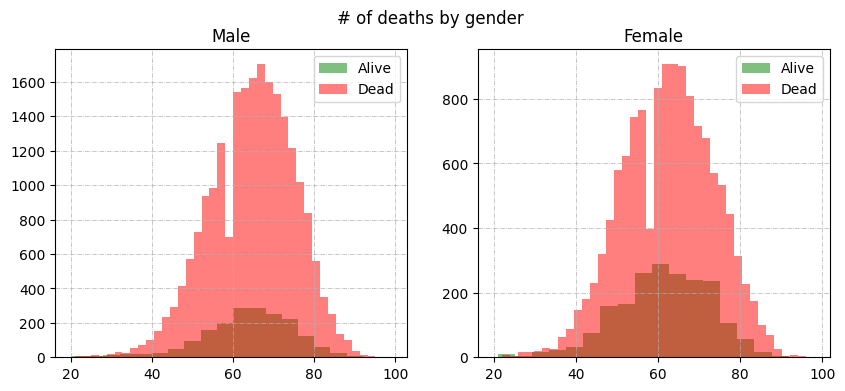

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

men = data[data["SEXO"]==1]
women = data[data["SEXO"]==2]

axes[0].hist(men[men["OBITO"]==0]["IDADE"], bins=18, label="Alive", alpha=0.5, color="green")
axes[0].hist(men[men["OBITO"]==1]["IDADE"], bins=40, label="Dead", alpha=0.5, color="red")
axes[0].legend()
axes[0].set_title("Male")
axes[0].grid(ls="-.", lw=.5)

axes[1].hist(women[women["OBITO"]==0]["IDADE"], bins=18, label="Alive", alpha=0.5, color="green")
axes[1].hist(women[women["OBITO"]==1]["IDADE"], bins=40, label="Dead", alpha=0.5, color="red")
axes[1].legend()
axes[1].set_title("Female")
axes[1].grid(ls="-.", lw=.5)

fig.suptitle("# of deaths by gender")
plt.show()

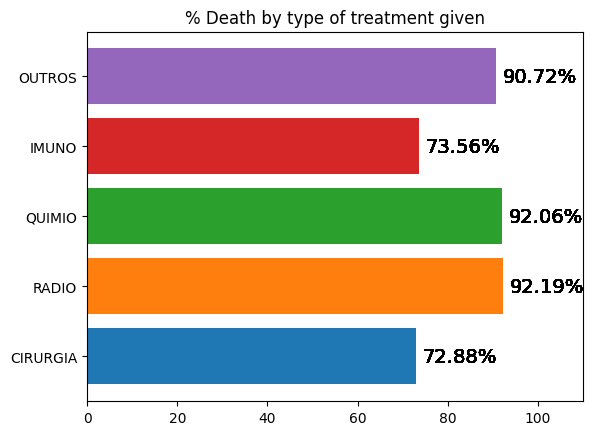

In [20]:
fig, ax = plt.subplots()

for cat in ["CIRURGIA", "RADIO", "QUIMIO", "IMUNO", "OUTROS"]:
    percentage = data[(data[cat] == 1) & (data["OBITO"] == 1)].count()/data[data[cat] == 1].count()*100
    p = ax.barh(y=cat, data=data[cat], width=percentage)
    # ax.barh(y=cat, data=data[cat], width=1-percentage, left=percentage, height=0.2)
    ax.bar_label(p, label_type="edge", fmt="%.2f%%", color="black", fontsize=14, padding=5)
    ax.set_xlim(right=110)
    
plt.xticks(range(0, 101, 20))
plt.title("% Death by type of treatment given")
plt.show()

# **__Pre Process Data__**

### 1. Converting strings to values

In [21]:
le = LabelEncoder()

strings = ["DSCINST", "TOPO", "DESCIDO", "EC", "ECGRUP", "CIDADEINST"] #RRASINST
data[strings] = data[strings].apply(le.fit_transform)
data = data.apply(pd.to_numeric)

### 2. Scaling values

#### 2.1 ESCOLARI CATEATEND DIAGTRAT TRATCONS last values are undefined, not bigger

In [22]:
data[["ESCOLARI", "CATEATEND"]] = data[["ESCOLARI", "CATEATEND"]].replace(9, 0)
display(data[["ESCOLARI", "CATEATEND"]])

,ESCOLARI,CATEATEND
169,0,0
171,0,0
172,2,2
173,0,0
174,3,2
...,...,...
1019801,5,0
1021918,2,2
1021920,3,2
1025926,0,2


In [23]:
display(data[["DIAGTRAT", "TRATCONS"]].isnull().sum())
data[["DIAGTRAT", "TRATCONS"]] = data[["DIAGTRAT", "TRATCONS"]].fillna(0)
data[["DIAGTRAT", "TRATCONS"]].isnull().sum()

DIAGTRAT    6398
TRATCONS    6398
dtype: int64

DIAGTRAT    0
TRATCONS    0
dtype: int64

#### 2.2 SEXO CATEATEND DIAGPREV MORFO HABILIT2 INSTITU IBGE IBGEATEN TOPO EC DRS DRSINST RRASINST values are categories, not scale

In [24]:
data["SEXO"] = data["SEXO"] - 1

#### 2.3 Scaling rest of columns

In [25]:
ss = StandardScaler()

scale_columns = ["IDADE", "ANODIAG"]

# data[scale_columns] = data[scale_columns].apply(ss.fit_transform)
data[scale_columns] = ss.fit_transform(data[scale_columns])

### 3. Setting right format type to columns

In [26]:
display(data.dtypes)
data = data.convert_dtypes()
display(data.dtypes)

INSTITU         int64
DSCINST         int32
ESCOLARI        int64
IDADE         float64
SEXO            int64
IBGE            int64
CATEATEND       int64
DIAGPREV        int64
TOPO            int32
MORFO           int64
DESCIDO         int32
EC              int32
ECGRUP          int32
NENHUM          int64
CIRURGIA        int64
RADIO           int64
QUIMIO          int64
IMUNO           int64
OUTROS          int64
NENHUMAPOS      int64
CIRURAPOS       int64
RADIOAPOS       int64
QUIMIOAPOS      int64
IMUNOAPOS       int64
OUTROAPOS       int64
ULTINFO         int64
CONSDIAG        int64
TRATCONS      float64
DIAGTRAT      float64
ANODIAG       float64
DRS             int64
IBGEATEN        int64
RRASINST        int64
CIDADEINST      int32
HABILIT2        int64
OBITO           int32
dtype: object

INSTITU         Int64
DSCINST         Int32
ESCOLARI        Int64
IDADE         Float64
SEXO            Int64
IBGE            Int64
CATEATEND       Int64
DIAGPREV        Int64
TOPO            Int32
MORFO           Int64
DESCIDO         Int32
EC              Int32
ECGRUP          Int32
NENHUM          Int64
CIRURGIA        Int64
RADIO           Int64
QUIMIO          Int64
IMUNO           Int64
OUTROS          Int64
NENHUMAPOS      Int64
CIRURAPOS       Int64
RADIOAPOS       Int64
QUIMIOAPOS      Int64
IMUNOAPOS       Int64
OUTROAPOS       Int64
ULTINFO         Int64
CONSDIAG        Int64
TRATCONS        Int64
DIAGTRAT        Int64
ANODIAG       Float64
DRS             Int64
IBGEATEN        Int64
RRASINST        Int64
CIDADEINST      Int32
HABILIT2        Int64
OBITO           Int32
dtype: object

### 4. Reseting index

In [27]:
data.reset_index(drop=True, inplace=True)

### 5. Splitting train and test

In [28]:
data = data.drop(columns=["ULTINFO"]) # because we calculated Y based on this column

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
display(X)
display(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

array([[20230, 57, 0, ..., 14, 2, 1],
       [20621, 56, 0, ..., 18, 1, 1],
       [18058, 14, 2, ..., 1, 32, 1],
       ...,
       [20621, 56, 3, ..., 18, 1, 1],
       [612374, 51, 0, ..., 6, 38, 2],
       [21130, 17, 3, ..., 13, 28, 2]], dtype=object)

<IntegerArray>
[1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
 ...
 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
Length: 38759, dtype: Int32

# **__ML Model__**

In [29]:
rfc = RandomForestClassifier(n_estimators=100, random_state=7)

rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

# **__ML Model Analysis__**

In [30]:
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

display(accuracy)
print(classification_rep)

0.9215686274509803

{'0.0': {'precision': 0.6835106382978723, 'recall': 0.3445040214477212, 'f1-score': 0.45811051693404636, 'support': 746.0}, '1.0': {'precision': 0.9337039045553145, 'recall': 0.9830145589494719, 'f1-score': 0.9577249339452093, 'support': 7006.0}, 'accuracy': 0.9215686274509803, 'macro avg': {'precision': 0.8086072714265934, 'recall': 0.6637592901985965, 'f1-score': 0.7079177254396278, 'support': 7752.0}, 'weighted avg': {'precision': 0.9096269983855452, 'recall': 0.9215686274509803, 'f1-score': 0.9096454247746305, 'support': 7752.0}}


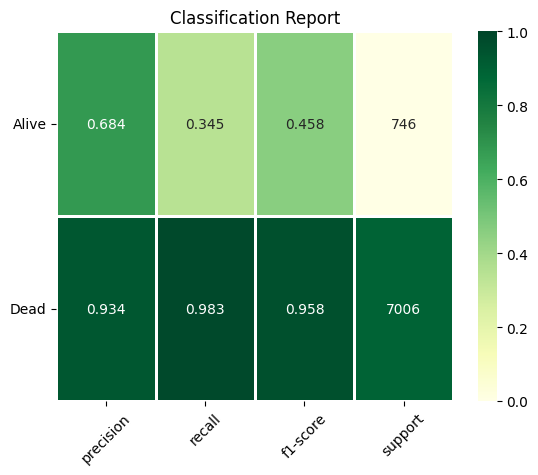

In [31]:
fig, ax = plt.subplots()

classification_rep["Alive"] = classification_rep.pop("0.0")
classification_rep["Dead"] = classification_rep.pop("1.0")
keys_to_plot = [key for key in classification_rep.keys() if key not in ("accuracy", "macro avg", "weighted avg")]
df = pd.DataFrame(classification_rep, columns=keys_to_plot).T

df.sort_values(by=["support"], inplace=True) 

rows, cols = df.shape
mask = np.zeros(df.shape)
mask[:,cols-1] = True

ax = sns.heatmap(df, mask=mask, annot=True, cmap="YlGn", fmt=".3g",
        vmin=0.0,
        vmax=1.0,
        linewidths=2, linecolor="white"
                )

mask = np.zeros(df.shape)
mask[:,:cols-1] = True    

ax = sns.heatmap(df, mask=mask, annot=True, cmap="YlGn", cbar=False,
        linewidths=2, linecolor="white", fmt=".0f",
        vmin=df["support"].min(),
        vmax=df["support"].sum(),         
        norm=mpl.colors.Normalize(vmin=df["support"].min(),
                                  vmax=df["support"].sum())
                ) 
        
plt.title("Classification Report")
plt.xticks(rotation = 45)
plt.yticks(rotation = 360)
plt.show()